In [19]:
import tensorflow as tf 
from tensorflow.python import keras
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.layers import Conv2D,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.optimizers import RMSprop
import keras.utils as image
from PIL import Image
import scipy.integrate as integrate 

from tensorflow.keras.layers import Conv2D,Flatten,Dense,Maxpool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np

In [32]:
img_height,img_width=(400,400)
batch_size=32

train_data_dir=r"C:\Users\lENOVOO\Desktop\Mproject\TT\Vdata"
valid_data_dir=r"C:\Users\lENOVOO\Desktop\Mproject\TT\Data"
test_data_dir=r"C:\Users\lENOVOO\Desktop\Mproject\TT\Tdata"

In [33]:
train_datagen= ImageDataGenerator(preprocessing_function=preprocess_input,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.4)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(img_height,img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 subset='training'
                                                 )
valid_generator=train_datagen.flow_from_directory(valid_data_dir,
                                                 target_size=(img_height,img_width),
                                                 batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                 )

Found 3006 images belonging to 25 classes.
Found 8096 images belonging to 25 classes.


In [34]:
test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                 target_size=(img_height,img_width),
                                                 batch_size=1,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                 )

Found 1001 images belonging to 25 classes.


In [35]:
x,y=test_generator.next()
x.shape
train_generator.num_classes


25

In [39]:
base_model=ResNet50(include_top=False,weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(64,activation='relu')(x)
x=Flatten()(x)


predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False
    
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
model.fit(train_generator,epochs=10,steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 88s 9s/step - loss: 2.9954 - accuracy: 0.2406
Epoch 2/10
10/10 [==============================] - 94s 9s/step - loss: 2.2893 - accuracy: 0.4563
Epoch 3/10
10/10 [==============================] - 92s 9s/step - loss: 1.8230 - accuracy: 0.5818
Epoch 4/10
10/10 [==============================] - 94s 9s/step - loss: 1.3604 - accuracy: 0.7188
Epoch 5/10
10/10 [==============================] - 94s 9s/step - loss: 1.0573 - accuracy: 0.8375
Epoch 6/10
10/10 [==============================] - 94s 9s/step - loss: 0.8204 - accuracy: 0.9187
Epoch 7/10
10/10 [==============================] - 93s 9s/step - loss: 0.6365 - accuracy: 0.9469
Epoch 8/10
10/10 [==============================] - 94s 9s/step - loss: 0.4740 - accuracy: 0.9719
Epoch 9/10
10/10 [==============================] - 93s 9s/step - loss: 0.3857 - accuracy: 0.9719
Epoch 10/10
10/10 [==============================] - 95s 9s/step - loss: 0.3191 - accuracy: 0.9906


In [37]:
test_loss,test_acc=model.evaluate(test_generator,verbose=2)
print('\ntest accuracy:',test_acc)

1001/1001 - 347s - loss: 0.6529 - accuracy: 0.8272 - 347s/epoch - 347ms/step

test accuracy: 0.8271728157997131


In [40]:
model.save(r"C:\Users\lENOVOO\Desktop\Mproject\babycode\babycode8.h5")

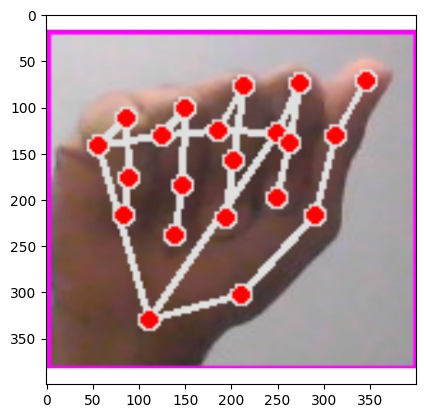

1/1 [==============================] - 1s 1s/step
[[1.46100959e-02 5.33709899e-05 5.37774002e-04 6.01694182e-07
  2.02400964e-02 3.72600173e-09 7.14169482e-06 6.60050148e-03
  2.04418600e-02 4.67598409e-04 5.31107980e-06 2.82945752e-04
  7.14755806e-05 1.40213699e-04 3.13149835e-03 4.33379726e-04
  1.44830230e-03 2.16012611e-03 9.23888147e-01 1.02597216e-04
  4.55908058e-03 1.46087984e-06 3.97122506e-07 8.12540529e-04
  3.44413388e-06]]


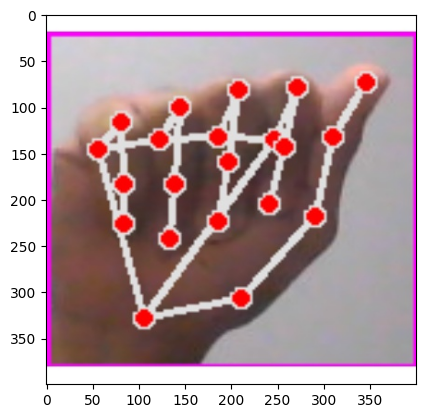

1/1 [==============================] - 0s 249ms/step
[[1.6706230e-02 8.5234409e-05 8.7197876e-04 2.8827610e-06 2.5270518e-02
  1.4520087e-08 1.4914169e-05 9.4475821e-03 4.0950239e-02 6.6316529e-04
  1.1792410e-05 7.6316867e-04 6.9090529e-05 9.2643721e-05 7.7431318e-03
  7.3947187e-04 5.5432050e-03 4.0858635e-03 8.7895948e-01 1.0431433e-04
  6.8830880e-03 1.5459426e-06 6.8932627e-07 9.8719413e-04 2.5553854e-06]]


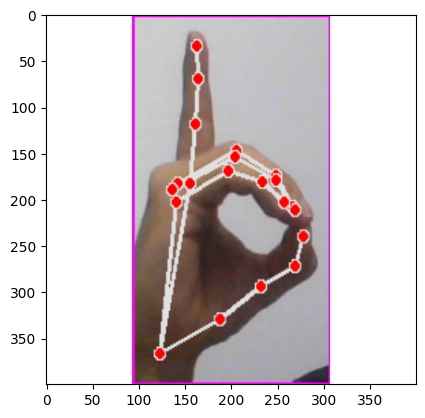

1/1 [==============================] - 0s 252ms/step
[[3.78335159e-07 3.83000675e-04 1.04695275e-04 4.91276622e-01
  2.85825180e-03 4.96123948e-06 4.53130197e-05 1.16320653e-03
  6.20827195e-04 1.82726879e-07 4.18648682e-07 9.83201317e-05
  6.96889992e-06 1.95642197e-10 3.01649690e-01 5.04141790e-05
  1.51428292e-02 1.72036816e-04 9.88689996e-03 4.48102462e-08
  1.07657375e-04 9.88429929e-06 1.78062677e-07 1.76417127e-01
  8.82496067e-08]]


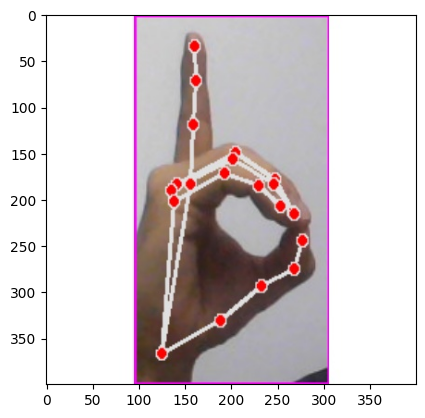

1/1 [==============================] - 0s 207ms/step
[[6.3997993e-07 1.3783226e-03 8.1321930e-05 5.3970104e-01 3.7937381e-03
  2.8894490e-06 8.2490464e-05 9.0952637e-04 1.0748791e-03 6.0549047e-07
  5.5377404e-07 1.2159079e-04 1.7520959e-05 5.2581667e-10 2.4057433e-01
  5.8172449e-05 1.2913015e-02 1.4012403e-04 1.1866255e-02 4.6535447e-08
  1.6342413e-04 1.0693588e-05 2.0019658e-07 1.8710843e-01 1.3146764e-07]]


In [9]:
dir_path=r"C:\Users\lENOVOO\Desktop\Mproject\TT\TestData"

for i in os.listdir(dir_path):
    img= image.load_img(dir_path+"//"+i,target_size=(400,400))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    print(val)

In [32]:

data= tf.keras.utils.image_dataset_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\DD\Tdata",batch_size=16,image_size=(400,400))
data_iterator = data.as_numpy_iterator()
batch= data_iterator.next()
print(batch[0].shape)
print(batch[1])

Found 2198 files belonging to 25 classes.
(16, 400, 400, 3)
[10 18  5  7 21 21  4 22  5 19 16 16 10 21 15 20]


In [2]:
train = ImageDataGenerator(rescale=1/255)
train_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Data",target_size=(400,400),batch_size=20,class_mode='categorical')

validation_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Vdata",target_size=(400,400),batch_size=20,class_mode='categorical')

test_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\TT\Tdata",target_size=(400,400),batch_size=20,class_mode='categorical')

Found 20257 images belonging to 25 classes.
Found 5008 images belonging to 25 classes.
Found 2504 images belonging to 25 classes.


In [18]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##

                                  ##
                                  tf.keras.layers.Flatten(),
                              
                                  ##
                                  tf.keras.layers.Dense(1,activation='softmax')
                                  ])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop( learning_rate=0.0001),
              metrics=['accuracy'])

logsdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logsdir)
model.fit(train_generator,epochs=10,steps_per_epoch=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential/dense_12/MatMul/MatMul' defined at (most recent call last):
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\lENOVOO\AppData\Local\Temp\ipykernel_10912\213596158.py", line 24, in <module>
      model.fit(train_generator,epochs=10,steps_per_epoch=10)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 585, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 643, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 519, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/dense_12/MatMul/MatMul'
Matrix size-incompatible: In[0]: [32,25], In[1]: [147456,1]
	 [[{{node gradient_tape/sequential/dense_12/MatMul/MatMul}}]] [Op:__inference_train_function_39873]

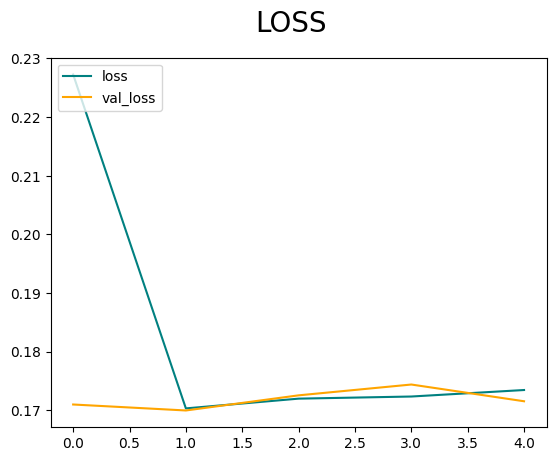

In [4]:
fig= plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

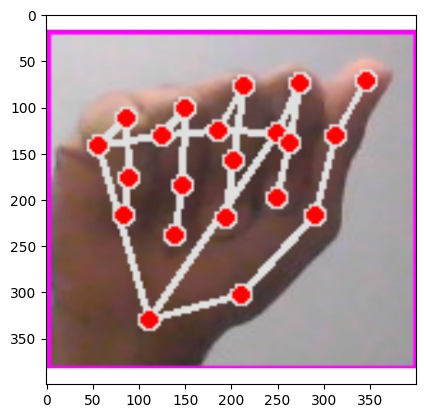

1/1 [==============================] - 0s 60ms/step
[[0.]]


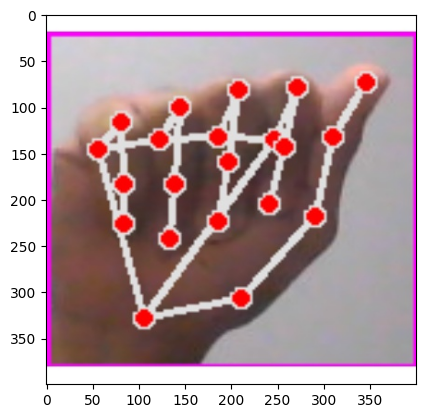

1/1 [==============================] - 0s 41ms/step
[[0.]]


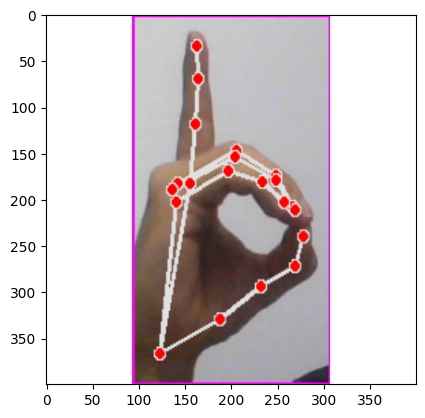

1/1 [==============================] - 0s 51ms/step
[[0.]]


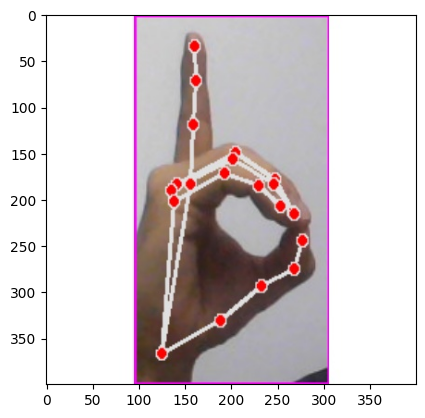

1/1 [==============================] - 0s 57ms/step
[[0.]]


In [14]:
dir_path=r"C:\Users\lENOVOO\Desktop\Mproject\TT\TestData"

for i in os.listdir(dir_path):
    img= image.load_img(dir_path+"//"+i,target_size=(400,400))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    print(val)
    